<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Multiple_Time_Series_using_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to video explaining the code - https://www.youtube.com/watch?v=UhxCsweuKE4

In [6]:
!pip uninstall download -y

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Uninstalling download-0.3.5:
  Successfully uninstalled download-0.3.5


In [ ]:
!pip install fbprophet

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
#import plotly.express as px

#from download import download


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [ ]:
#path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/tmp/aq', kind="zip")

Creating data folder...

file_sizes: 100%|██████████████████████████| 7.96M/7.96M [00:00<00:00, 12.6MB/s]
Extracting zip file...
Successfully downloaded / unzipped to /tmp/aq


In [8]:
!ls ../DATA

PRSA_Data_Aotizhongxin_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv
PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [9]:
def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %H')

In [10]:
aq_df_sh = pd.read_csv('../DATA/PRSA_Data_Shunyi_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date)

In [11]:
aq_df_wa = pd.read_csv('../DATA/PRSA_Data_Wanliu_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date)

In [12]:
aq_df_gu = pd.read_csv('../DATA/PRSA_Data_Gucheng_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date)

In [13]:
aq_df = pd.concat([aq_df_sh, aq_df_wa,aq_df_gu], ignore_index=True, sort=False)

In [14]:
aq_df

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,2,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,3,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,4,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,5,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,2017-02-28 19:00:00,35060,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
105188,2017-02-28 20:00:00,35061,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
105189,2017-02-28 21:00:00,35062,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
105190,2017-02-28 22:00:00,35063,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng


In [15]:
aq_df=aq_df.drop(['No'], axis=1)

In [16]:
aq_df

,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,2017-02-28 19:00:00,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
105188,2017-02-28 20:00:00,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
105189,2017-02-28 21:00:00,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
105190,2017-02-28 22:00:00,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng


In [17]:
aq_df_daily = aq_df.set_index('year_month_day_hour').groupby('station').resample('D').mean()

In [23]:
aq_df_daily = aq_df_daily.reset_index().set_index('year_month_day_hour')

In [24]:
aq_df_daily

,index,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year_month_day_hour,,,,,,,,,,,,,
2013-03-01,0,Gucheng,8.625000,16.875000,7.391304,14.250000,869.565217,77.130435,1.691667,1024.816667,-19.691667,0.0,2.350000
2013-03-02,1,Gucheng,36.916667,51.375000,37.291667,37.565217,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500
2013-03-03,2,Gucheng,80.333333,120.041667,47.541667,63.333333,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000
2013-03-04,3,Gucheng,26.500000,51.291667,18.666667,32.666667,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667
2013-03-05,4,Gucheng,136.708333,172.541667,75.130435,73.500000,1381.545455,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-24,4378,Wanliu,21.458333,39.666667,8.750000,55.875000,837.500000,38.583333,4.395833,1019.466667,-10.583333,0.0,1.262500
2017-02-25,4379,Wanliu,8.250000,21.166667,6.375000,36.916667,491.666667,56.375000,6.387500,1017.287500,-9.900000,0.0,1.466667
2017-02-26,4380,Wanliu,27.125000,44.583333,14.250000,69.916667,887.500000,30.250000,6.720833,1018.758333,-7.558333,0.0,1.562500


<AxesSubplot:xlabel='year_month_day_hour'>

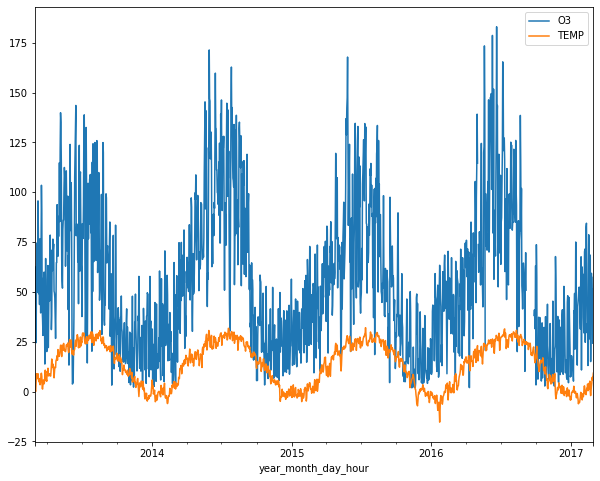

In [26]:
aq_df_daily.query("station=='Shunyi'")[['O3','TEMP']].plot()

<AxesSubplot:xlabel='year_month_day_hour'>

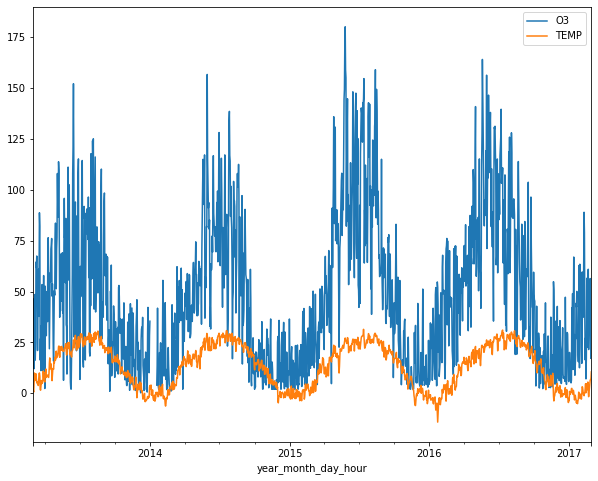

In [27]:
aq_df_daily.query("station=='Wanliu'")[['O3','TEMP']].plot()

<AxesSubplot:xlabel='year_month_day_hour'>

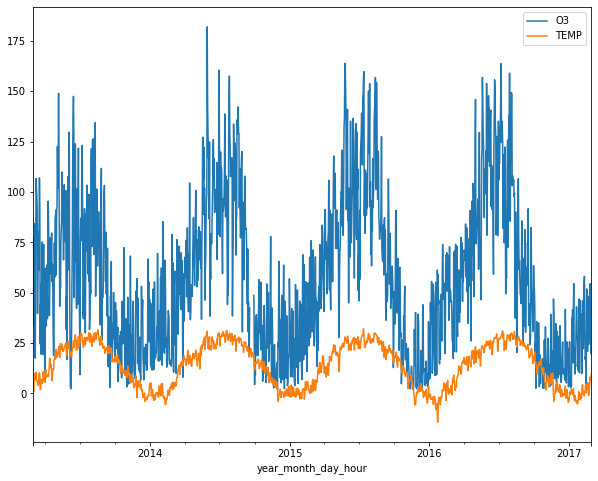

In [28]:
aq_df_daily.query("station=='Gucheng'")[['O3','TEMP']].plot()

station
Gucheng    AxesSubplot(0.125,0.125;0.775x0.755)
Shunyi     AxesSubplot(0.125,0.125;0.775x0.755)
Wanliu     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

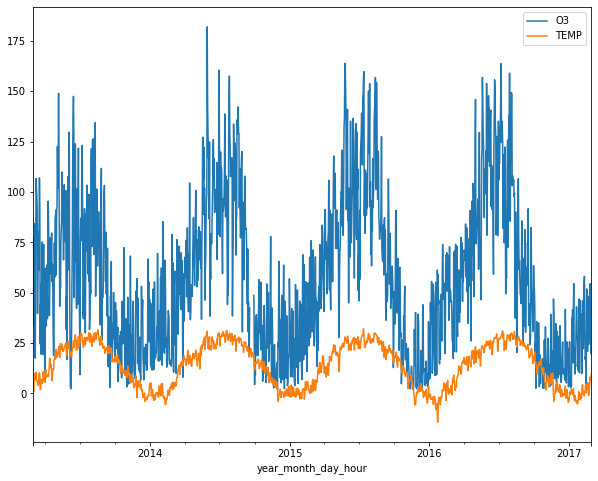

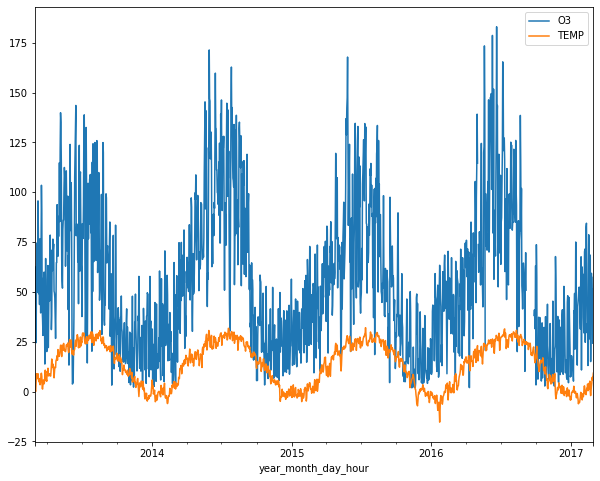

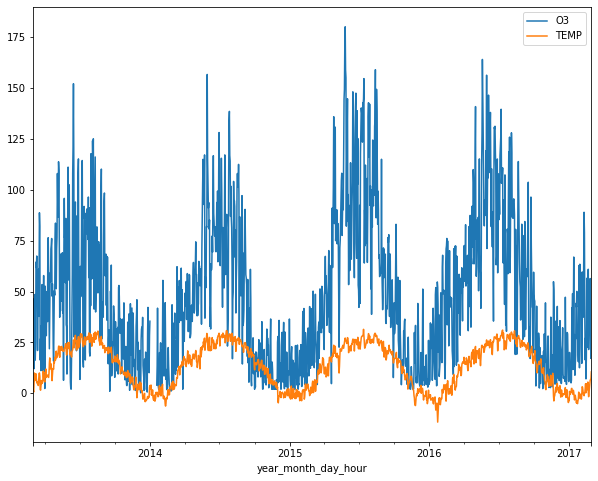

In [29]:
aq_df_daily.groupby('station')[['O3','TEMP']].plot()

In [33]:
aq_df_daily  = aq_df_daily.reset_index()

In [34]:
aq_df_daily['station'].unique()

array(['Gucheng', 'Shunyi', 'Wanliu'], dtype=object)

In [ ]:
from fbprophet import Prophet

In [35]:
aq_df_final = aq_df_daily[['year_month_day_hour','O3','TEMP','station']].rename({'year_month_day_hour':'ds','O3':'y'}, axis='columns')

In [36]:
aq_df_final

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
...,...,...,...,...
4378,2017-02-24,38.583333,4.395833,Wanliu
4379,2017-02-25,56.375000,6.387500,Wanliu
4380,2017-02-26,30.250000,6.720833,Wanliu
4381,2017-02-27,17.136364,7.220833,Wanliu


In [37]:
stations = aq_df_final.groupby('station')

In [39]:
stations.head()

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
1461,2013-03-01,62.478261,0.541667,Shunyi
1462,2013-03-02,40.416667,0.083333,Shunyi
1463,2013-03-03,24.541667,5.029167,Shunyi
1464,2013-03-04,55.125000,8.937500,Shunyi
1465,2013-03-05,74.541667,6.450000,Shunyi


In [40]:
for station in stations.groups:
    group = stations.get_group(station)
    train=group[(group['ds'] >= '2013-03-01') & (group['ds'] <= '2016-02-28')]
    test=group[(group['ds'] > '2016-02-28')]
    print(test.shape)

(366, 4)
(366, 4)
(366, 4)


In [42]:
[station for station in stations.groups]

['Gucheng', 'Shunyi', 'Wanliu']

In [44]:
[stations.get_group(station) for station in stations.groups]

[             ds          y      TEMP  station
 0    2013-03-01  77.130435  1.691667  Gucheng
 1    2013-03-02  39.583333  0.820833  Gucheng
 2    2013-03-03  33.708333  6.562500  Gucheng
 3    2013-03-04  67.250000  9.795833  Gucheng
 4    2013-03-05  84.375000  6.750000  Gucheng
 ...         ...        ...       ...      ...
 1456 2017-02-24  36.875000  5.354167  Gucheng
 1457 2017-02-25  54.458333  8.212500  Gucheng
 1458 2017-02-26  27.166667  6.537500  Gucheng
 1459 2017-02-27  19.625000  7.216667  Gucheng
 1460 2017-02-28  41.791667  9.754167  Gucheng
 
 [1461 rows x 4 columns],
              ds          y      TEMP station
 1461 2013-03-01  62.478261  0.541667  Shunyi
 1462 2013-03-02  40.416667  0.083333  Shunyi
 1463 2013-03-03  24.541667  5.029167  Shunyi
 1464 2013-03-04  55.125000  8.937500  Shunyi
 1465 2013-03-05  74.541667  6.450000  Shunyi
 ...         ...        ...       ...     ...
 2917 2017-02-24  47.416667  4.295833  Shunyi
 2918 2017-02-25  51.458333  7.141667  S

In [45]:
train

,ds,y,TEMP,station
2922,2013-03-01,46.347826,1.391667,Wanliu
2923,2013-03-02,17.666667,0.616667,Wanliu
2924,2013-03-03,12.083333,5.566667,Wanliu
2925,2013-03-04,31.750000,9.962500,Wanliu
2926,2013-03-05,48.541667,6.291667,Wanliu
...,...,...,...,...
4012,2016-02-24,42.478261,-0.208333,Wanliu
4013,2016-02-25,45.208333,1.945833,Wanliu
4014,2016-02-26,47.217391,2.529167,Wanliu
4015,2016-02-27,42.375000,3.683333,Wanliu


In [ ]:
target = pd.DataFrame()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


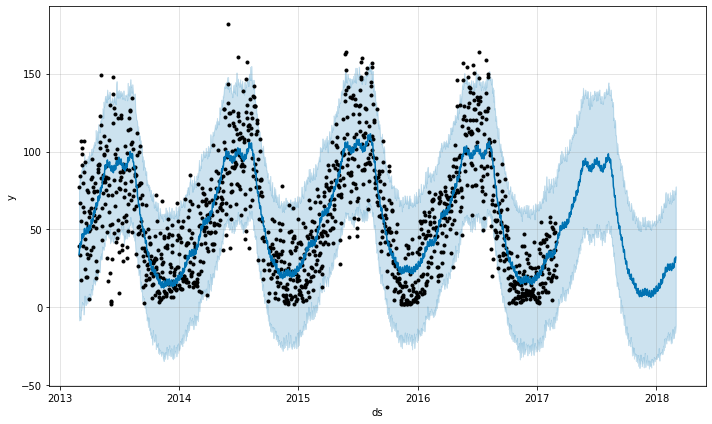

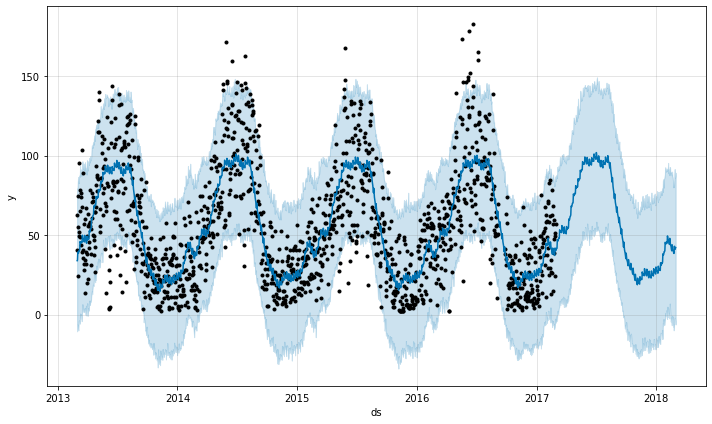

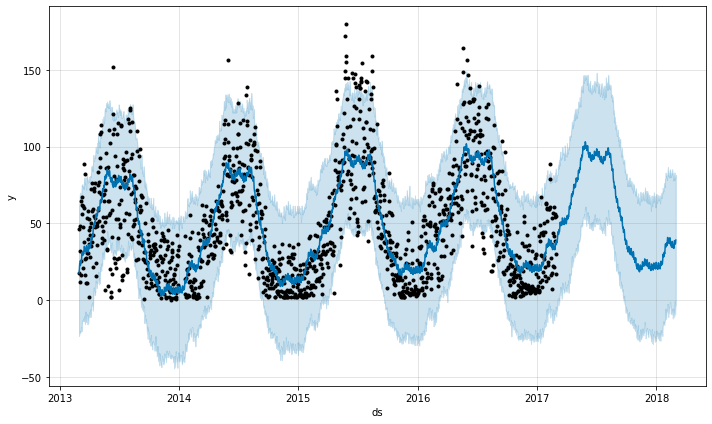

In [ ]:
for station in stations.groups:
    group = stations.get_group(station)
    
    m = Prophet(interval_width=0.95)
    m.fit(group)
    future = m.make_future_dataframe(periods=366)
    forecast = m.predict(future)  
    m.plot(forecast)  
    forecast = forecast.rename(columns={'yhat': 'yhat_'+station})
    target = pd.merge(target, forecast.set_index('ds'), how='outer', left_index=True, right_index=True)

In [ ]:
target

,trend_x,yhat_lower_x,yhat_upper_x,trend_lower_x,trend_upper_x,additive_terms_x,additive_terms_lower_x,additive_terms_upper_x,weekly_x,weekly_lower_x,weekly_upper_x,yearly_x,yearly_lower_x,yearly_upper_x,multiplicative_terms_x,multiplicative_terms_lower_x,multiplicative_terms_upper_x,yhat_Gucheng,trend_y,yhat_lower_y,yhat_upper_y,trend_lower_y,trend_upper_y,additive_terms_y,additive_terms_lower_y,additive_terms_upper_y,weekly_y,weekly_lower_y,weekly_upper_y,yearly_y,yearly_lower_y,yearly_upper_y,multiplicative_terms_y,multiplicative_terms_lower_y,multiplicative_terms_upper_y,yhat_Shunyi,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat_Wanliu
ds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01,49.084059,-8.316120,75.994218,49.084059,49.084059,-15.179868,-15.179868,-15.179868,-1.940995,-1.940995,-1.940995,-13.238873,-13.238873,-13.238873,0.0,0.0,0.0,33.904191,51.043807,-10.530188,79.360088,51.043807,51.043807,-17.147816,-17.147816,-17.147816,-1.301577,-1.301577,-1.301577,-15.846240,-15.846240,-15.846240,0.0,0.0,0.0,33.895991,37.010620,-23.291659,61.608788,37.010620,37.010620,-19.299212,-19.299212,-19.299212,-1.925011,-1.925011,-1.925011,-17.374201,-17.374201,-17.374201,0.0,0.0,0.0,17.711409
2013-03-02,49.099025,-5.739818,78.928733,49.099025,49.099025,-13.116501,-13.116501,-13.116501,-0.800782,-0.800782,-0.800782,-12.315719,-12.315719,-12.315719,0.0,0.0,0.0,35.982524,51.055284,-6.194529,79.314097,51.055284,51.055284,-16.824081,-16.824081,-16.824081,-1.746628,-1.746628,-1.746628,-15.077453,-15.077453,-15.077453,0.0,0.0,0.0,34.231202,37.022769,-22.002185,63.290934,37.022769,37.022769,-16.969811,-16.969811,-16.969811,-0.469608,-0.469608,-0.469608,-16.500203,-16.500203,-16.500203,0.0,0.0,0.0,20.052958
2013-03-03,49.113990,-6.881472,84.257271,49.113990,49.113990,-9.354453,-9.354453,-9.354453,2.014621,2.014621,2.014621,-11.369073,-11.369073,-11.369073,0.0,0.0,0.0,39.759538,51.066760,-7.781578,83.562097,51.066760,51.066760,-11.674611,-11.674611,-11.674611,2.562108,2.562108,2.562108,-14.236719,-14.236719,-14.236719,0.0,0.0,0.0,39.392149,37.034918,-20.172511,68.085469,37.034918,37.034918,-13.157718,-13.157718,-13.157718,2.407774,2.407774,2.407774,-15.565492,-15.565492,-15.565492,0.0,0.0,0.0,23.877200
2013-03-04,49.128956,-7.217237,81.769037,49.128956,49.128956,-8.105451,-8.105451,-8.105451,2.304802,2.304802,2.304802,-10.410253,-10.410253,-10.410253,0.0,0.0,0.0,41.023505,51.078237,-9.137784,86.573380,51.078237,51.078237,-12.216837,-12.216837,-12.216837,1.122989,1.122989,1.122989,-13.339827,-13.339827,-13.339827,0.0,0.0,0.0,38.861399,37.047066,-21.176492,69.981602,37.047066,37.047066,-12.654523,-12.654523,-12.654523,1.930802,1.930802,1.930802,-14.585325,-14.585325,-14.585325,0.0,0.0,0.0,24.392543
2013-03-05,49.143922,-8.169264,83.561437,49.143922,49.143922,-10.736008,-10.736008,-10.736008,-1.285152,-1.285152,-1.285152,-9.450856,-9.450856,-9.450856,0.0,0.0,0.0,38.407914,51.089713,-9.823300,83.949043,51.089713,51.089713,-12.578902,-12.578902,-12.578902,-0.175208,-0.175208,-0.175208,-12.403695,-12.403695,-12.403695,0.0,0.0,0.0,38.510811,37.059215,-21.087540,65.457198,37.059215,37.059215,-14.516528,-14.516528,-14.516528,-0.940577,-0.940577,-0.940577,-13.575952,-13.575952,-13.575952,0.0,0.0,0.0,22.542686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,45.309038,-12.358691,73.371209,42.639799,47.850912,-14.653443,-14.653443,-14.653443,2.014621,2.014621,2.014621,-16.668064,-16.668064,-16.668064,0.0,0.0,0.0,30.655595,58.456773,-3.986239,88.199337,56.786806,60.056645,-15.457295,-15.457295,-15.457295,2.562108,2.562108,2.562108,-18.019403,-18.019403,-18.

In [ ]:
target = target[['yhat_' + station for station in stations.groups.keys()]]

In [ ]:
target

,yhat_Gucheng,yhat_Shunyi,yhat_Wanliu
ds,,,
2013-03-01,33.904191,33.895991,17.711409
2013-03-02,35.982524,34.231202,20.052958
2013-03-03,39.759538,39.392149,23.877200
2013-03-04,41.023505,38.861399,24.392543
2013-03-05,38.407914,38.510811,22.542686
...,...,...,...
2018-02-25,30.655595,42.999478,38.722104
2018-02-26,31.638301,41.894387,38.733790
2018-02-27,28.803092,41.047648,36.456615


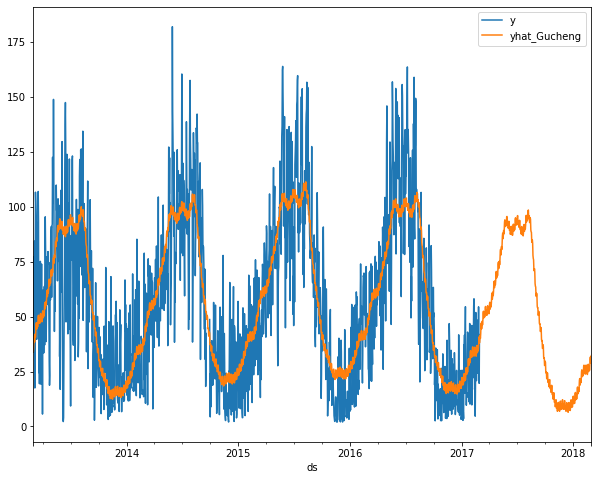

In [ ]:
pd.concat([aq_df_final.set_index('ds').query("station=='Gucheng'")['y'],target['yhat_Gucheng']],axis=1).plot()

In [ ]:
pd.concat([aq_df_final.set_index('ds').query("station=='Wanliu'")['y'],target['yhat_Wanliu']],axis=1).plot()